In [1]:
# !pip install xgboost

In [1]:
import random as rd
rd.seed(0)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
import xgboost as xg

# Preprocessing exploration 

In [3]:
data = pd.read_csv('data2.csv')
data.head(5)

,file_name,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y466,y467,y468,pitch,yaw,roll,h,v,t,scale
0,image00002,-1.594493,0.0,0.273813,-4.258785,0.613944,1.997763,6.299825,-56.482413,8.745705,...,-62.707633,-75.773491,-79.072487,-0.399231,0.018227,0.085676,231.465317,262.066589,-102.793602,0.001587
1,image00004,10.903019,0.0,14.204845,8.424470,-0.682220,4.278231,21.117206,21.212491,25.584948,...,-34.802011,-41.403008,-43.588780,0.470065,1.189533,0.300959,330.819702,173.194244,-44.367504,0.001181
2,image00008,15.480316,0.0,8.992133,-11.289753,-3.494462,-5.583005,-8.172262,-48.574658,-14.342710,...,-60.867530,-89.236236,-94.180499,-0.175379,0.299208,-0.373374,262.805054,211.201294,-102.680016,0.001294
3,image00013,7.879311,0.0,3.162163,-11.412464,-2.037916,-4.110177,-8.307070,-60.646449,-10.829245,...,-50.452325,-68.443993,-70.299277,-0.026812,0.011965,-0.220662,225.624603,199.878860,-109.525414,0.001357
4,image00014,3.662235,0.0,2.879432,-5.797742,-0.535919,-0.180472,1.884145,-49.433380,2.246135,...,-43.464111,-50.942150,-52.917141,0.057119,0.110732,-0.043283,239.685089,190.156235,-109.077309,0.001341


In [4]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,y466,y467,y468,pitch,yaw,roll,h,v,t,scale
count,1835.000000,1835.0,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,...,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000
mean,0.653784,0.0,0.417743,-6.050050,-0.132272,-0.162727,-0.045237,-50.675876,-0.210103,-0.367470,...,-46.730109,-56.510268,-59.886670,-0.094108,0.014334,-0.034242,228.799657,206.596466,-89.313924,0.001360
std,10.986264,0.0,8.968996,8.387220,2.219734,4.815548,14.496182,30.819028,19.616899,21.431815,...,12.847908,21.735150,22.683147,0.552639,0.578158,0.652992,56.315137,27.176263,27.480704,0.000194
min,-32.511377,0.0,-28.177062,-36.314321,-9.909448,-22.494413,-59.686674,-148.466022,-85.524501,-97.373722,...,-103.200352,-128.665620,-137.349795,-12.457202,-6.130066,-16.969362,47.105087,87.869553,-150.239090,-0.001489
25%,-7.565358,0.0,-5.766200,-10.887355,-1.324193,-2.591644,-8.504668,-71.588809,-11.233474,-11.887517,...,-55.763206,-70.837120,-75.003415,-0.246061,-0.254039,-0.159940,194.241714,191.534698,-108.518337,0.001227
50%,1.002502,0.0,0.530782,-7.199049,-0.069013,-0.152054,-0.471801,-58.846191,-0.873837,-0.885639,...,-46.922806,-56.145474,-59.579721,-0.123066,0.020001,-0.016562,230.320404,207.430695,-98.125885,0.001354
75%,8.727653,0.0,6.726913,-1.310695,1.107296,2.257334,8.432879,-34.886722,10.951500,11.287419,...,-38.998233,-43.720429,-46.639524,0.031996,0.302307,0.124591,263.723373,223.562462,-79.001957,0.001483
max,35.393183,0.0,26.429254,25.224982,8.011074,19.316854,47.713856,75.872585,68.683822,79.432561,...,44.610634,54.203877,57.893041,15.598820,3.277500,2.166107,408.259674,303.224304,13.463660,0.002354


In [5]:
data.shape

(1835, 944)

In [6]:
data['dist'] = np.linalg.norm(data.loc[:, ["x378","y378"]].values, axis=1)
features = data.drop(["file_name","pitch","yaw","roll","h","v","t","scale","dist"], axis=1)
labels = data[["pitch","yaw","roll"]]
features.loc[:,:]=features.loc[:,:].div(data["dist"],axis=0)

In [7]:
features.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,y459,y460,y461,y462,y463,y464,y465,y466,y467,y468
0,-0.018770,0.0,0.003223,-0.050133,0.007227,0.023517,0.074159,-0.664891,0.102951,0.113227,...,0.007298,-0.022670,-0.015901,0.024165,0.025085,-0.818875,-0.778211,-0.738173,-0.891979,-0.930814
1,0.126695,0.0,0.165063,0.097894,-0.007928,0.049714,0.245386,0.246494,0.297302,0.286536,...,0.039655,0.017532,0.090665,0.042388,0.065991,-0.446016,-0.421082,-0.404407,-0.481112,-0.506511
2,0.171641,0.0,0.099702,-0.125178,-0.038746,-0.061903,-0.090612,-0.538582,-0.159028,-0.206915,...,-0.029927,-0.070488,-0.107101,-0.009980,-0.008048,-0.763165,-0.715027,-0.674882,-0.989426,-1.044246
3,0.075672,0.0,0.030369,-0.109605,-0.019572,-0.039474,-0.079781,-0.582444,-0.104003,-0.124085,...,0.008730,-0.025872,0.009773,0.019899,0.038258,-0.531082,-0.501953,-0.484541,-0.657331,-0.675149
4,0.033997,0.0,0.026730,-0.053821,-0.004975,-0.001675,0.017491,-0.458897,0.020851,0.017586,...,0.031687,0.003566,0.070722,0.037475,0.060175,-0.424860,-0.409922,-0.403483,-0.472903,-0.491237


In [8]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,1835.0,0.001185,0.119757,-0.379522,-0.084926,0.010698,0.089014,0.331561
x2,1835.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
x3,1835.0,-0.000861,0.099901,-0.251522,-0.064886,0.005677,0.068807,0.212193
x4,1835.0,-0.067127,0.093170,-0.465573,-0.121822,-0.076112,-0.013850,0.292586
x5,1835.0,-0.000686,0.023626,-0.103228,-0.014454,-0.000738,0.012668,0.088774
...,...,...,...,...,...,...,...,...
y464,1835.0,-0.557230,0.182384,-1.279035,-0.663394,-0.552839,-0.451318,0.529086
y465,1835.0,-0.530395,0.170393,-1.203198,-0.627168,-0.524122,-0.432280,0.499690
y466,1835.0,-0.509411,0.158132,-1.127917,-0.599483,-0.503344,-0.419329,0.475479
y467,1835.0,-0.616663,0.249830,-1.724436,-0.773634,-0.614372,-0.467946,0.624933


Explore different criteria of scaling and test pca effect


*   based on exploration choosed minmax and pca of 6 componnent




In [9]:
PCA_t=PCA(n_components=0.98)
features1=PCA_t.fit_transform(features)
features1.shape

(1835, 5)

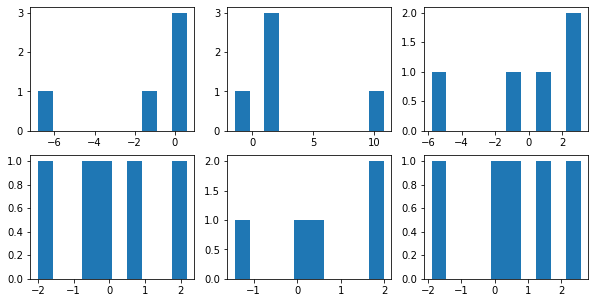

In [10]:
fig = plt.figure(figsize=(10,5))
for i in  range(6):
    ax1 = fig.add_subplot(2,3,i+1)
    ax1.hist(features1[i])
  

In [11]:
features2= RobustScaler().fit_transform(features)
PCA1=PCA(n_components=0.98)
features2=PCA1.fit_transform(features2)

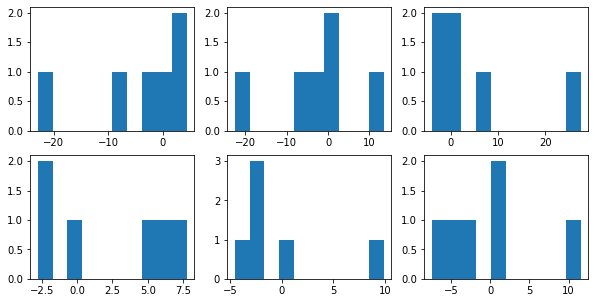

In [12]:
fig = plt.figure(figsize=(10,5))
for i in  range(6):
    ax1 = fig.add_subplot(2,3,i+1)
    ax1.hist(features2[i])
  

In [13]:
pd.DataFrame(features2).describe()

,0,1,2,3,4,5
count,1.835000e+03,1.835000e+03,1.835000e+03,1.835000e+03,1.835000e+03,1.835000e+03
mean,7.042505e-17,7.671732e-17,-6.776293e-18,4.056095e-16,-2.438255e-16,3.956871e-17
std,1.514823e+01,1.330112e+01,1.251793e+01,9.274665e+00,3.812956e+00,2.736992e+00
min,-5.553786e+01,-5.148040e+01,-3.801349e+01,-1.895614e+01,-1.054763e+01,-1.207126e+01
25%,-1.016432e+01,-8.683010e+00,-9.302480e+00,-5.053045e+00,-2.493613e+00,-1.943646e+00
50%,-4.070788e-01,5.322478e-01,-1.353488e+00,-2.099976e+00,1.893784e-01,-5.633946e-01
75%,8.313136e+00,8.816257e+00,7.680349e+00,2.260531e+00,2.575175e+00,1.458805e+00
max,5.834228e+01,7.384688e+01,5.947610e+01,1.279483e+02,1.317398e+01,1.314588e+01


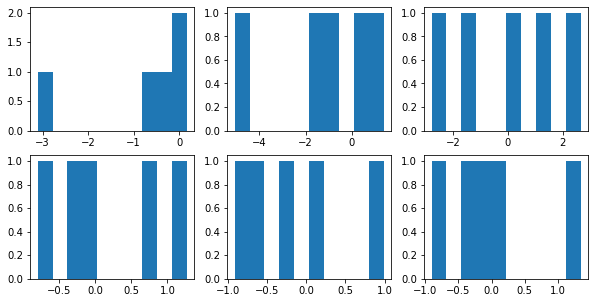

In [9]:
features3= MinMaxScaler().fit_transform(features)
PCA1=PCA(n_components=0.98)
features3=PCA1.fit_transform(features3)
fig = plt.figure(figsize=(10,5))
for i in  range(6):
    ax1 = fig.add_subplot(2,3,i+1)
    ax1.hist(features3[i])
  

In [ ]:
scaller= MinMaxScaler()
scaller.fit(features)
PCA1=PCA(n_components=0.98)
PCA1.fit(features3)

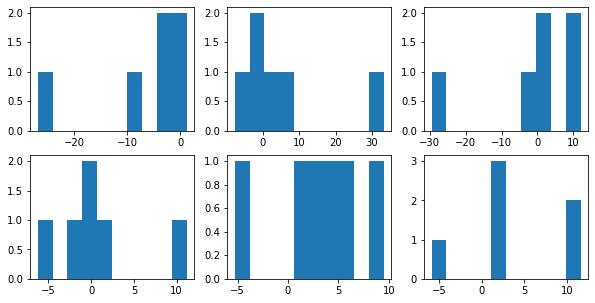

In [15]:
features4= StandardScaler().fit_transform(features)
PCA1=PCA(n_components=0.98)
features4=PCA1.fit_transform(features4)
fig = plt.figure(figsize=(10,5))
for i in  range(6):
    ax1 = fig.add_subplot(2,3,i+1)
    ax1.hist(features4[i])
  

In [16]:
features4.shape

(1835, 6)

In [17]:
features4[1]

array([33.25606964,  6.29268381,  3.62088679, -2.16549333, -7.75317822,
       -0.062082  ])

In [18]:
labels.describe().T

,count,mean,std,min,25%,50%,75%,max
pitch,1835.0,-0.094108,0.552639,-12.457202,-0.246061,-0.123066,0.031996,15.598820
yaw,1835.0,0.014334,0.578158,-6.130066,-0.254039,0.020001,0.302307,3.277500
roll,1835.0,-0.034242,0.652992,-16.969362,-0.159940,-0.016562,0.124591,2.166107


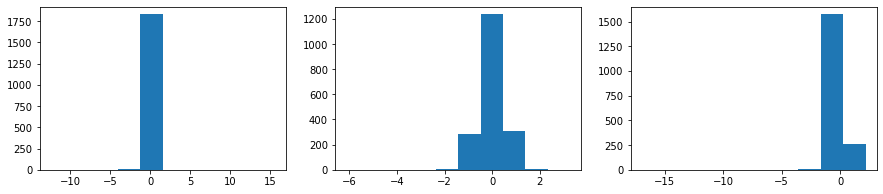

In [19]:
fig = plt.figure(figsize=(15,3))
i=0
for col in  labels.columns:
    ax1 = fig.add_subplot(1,3,i+1)
    ax1.hist(labels[col])
    i=i+1

# modelling

In [10]:
features=features3

In [11]:
features.shape

(1835, 5)

Explore different models

In [24]:
# remark: we fix random_state the end, to make sure we always get the same results
features_train, features_validation, labels_train, labels_validation = train_test_split(
    features, labels, test_size=0.2)

In [13]:
print(len(features_train))
print(len(features_validation))
print(len(labels_train))
print(len(labels_validation))

1468
367
1468
367


## yaw model exploration

In [14]:
reg_yaw =linear_model.LinearRegression()
reg_yaw.fit(features_train, labels_train["yaw"])
print("linear regression trainiing yaw",reg_yaw.score(features_train, labels_train["yaw"]))
print("linrear regression:", reg_yaw.score(features_validation, labels_validation["yaw"]))

linear regression trainiing yaw 0.8115930522973303
linrear regression: 0.8360749330174037


In [15]:
rf_yaw =RandomForestRegressor(random_state=42)
rf_yaw.fit(features_train, labels_train["yaw"])
print("random forest trainiing yaw",rf_yaw.score(features_train, labels_train["yaw"]))
print("random regression:", rf_yaw.score(features_validation, labels_validation["yaw"]))

random forest trainiing yaw 0.9655857633836787
random regression: 0.8497392297635553


In [16]:
gb_yaw =GradientBoostingRegressor(random_state=42)
gb_yaw.fit(features_train, labels_train["yaw"])
print("gb trainiing yaw",gb_yaw.score(features_train, labels_train["yaw"]))
print("gb regression:", gb_yaw.score(features_validation, labels_validation["yaw"]))

gb trainiing yaw 0.9728094189365268
gb regression: 0.8694254528438601


In [17]:
svr_yaw =SVR()
svr_yaw.fit(features_train, labels_train["yaw"])
print("svr trainiing yaw",svr_yaw.score(features_train, labels_train["yaw"]))
print("svr regression:", svr_yaw.score(features_validation, labels_validation["yaw"]))

svr trainiing yaw 0.869097172457943
svr regression: 0.8835788920810984


In [27]:
xgb_yaw = xg.XGBRegressor()
xgb_yaw.fit(features_train, labels_train["yaw"])
print("xgb trainiing pitch",xgb_yaw.score(features_train, labels_train["yaw"]))
print("xgb regression:", xgb_yaw.score(features_validation, labels_validation["yaw"]))


xgb trainiing pitch 0.9994346621904855
xgb regression: 0.8806446382329454


random forest regressor for yaw !!

## pitch model exploration

In [26]:
reg_pitch =linear_model.LinearRegression()
reg_pitch.fit(features_train, labels_train["pitch"])
print("linear regression trainiing pitch",reg_pitch.score(features_train, labels_train["pitch"]))
print("linrear regression:", reg_pitch.score(features_validation, labels_validation["pitch"]))

linear regression trainiing pitch 0.13847064013197463
linrear regression: 0.6300713720878028


In [27]:
rid_pitch =Ridge()
rid_pitch.fit(features_train, labels_train["pitch"])
print("ridge linear regression trainiing pitch",rid_pitch.score(features_train, labels_train["pitch"]))
print("ridge linrear regression:", rid_pitch.score(features_validation, labels_validation["pitch"]))

ridge linear regression trainiing pitch 0.1384705873535652
ridge linrear regression: 0.630074302644266


In [25]:
rf_pitch =RandomForestRegressor(random_state=42)
rf_pitch.fit(features_train, labels_train["pitch"])
print("random forest trainiing yaw",rf_pitch.score(features_train, labels_train["pitch"]))
print("random regression:", rf_pitch.score(features_validation, labels_validation["pitch"]))

random forest trainiing yaw 0.7307495698714456
random regression: 0.6345977832298962


In [28]:
gb_pitch =GradientBoostingRegressor(random_state=42)
gb_pitch.fit(features_train, labels_train["pitch"])
print("gb trainiing pitch",gb_pitch.score(features_train, labels_train["pitch"]))
print("gb regression:", gb_pitch.score(features_validation, labels_validation["pitch"]))

gb trainiing pitch 0.9566043940705743
gb regression: 0.6598663514544144


In [29]:
svr_pitch =SVR()
svr_pitch.fit(features_train, labels_train["pitch"])
print("svr trainiing pitch",svr_yaw.score(features_train, labels_train["pitch"]))
print("svr regression:", svr_yaw.score(features_validation, labels_validation["pitch"]))

svr trainiing pitch -0.772454518241509
svr regression: -3.7451847798798523


In [30]:
xgb_pitch = xg.XGBRegressor()
xgb_pitch.fit(features_train, labels_train["pitch"])
print("xgb trainiing pitch",xgb_pitch.score(features_train, labels_train["pitch"]))
print("xgb regression:", xgb_pitch.score(features_validation, labels_validation["pitch"]))

xgb trainiing pitch 0.9967865853911746
xgb regression: 0.5389163878224996


gradient MODEL FOR PITCH

## roll model exploration

In [31]:
reg_roll =linear_model.LinearRegression()
reg_roll.fit(features_train, labels_train["roll"])
print("linear regression trainiing roll",reg_roll.score(features_train, labels_train["roll"]))
print("linrear regression:", reg_roll.score(features_validation, labels_validation["roll"]))

linear regression trainiing roll 0.27799046444383124
linrear regression: 0.6768938754796932


In [32]:
rf_roll =RandomForestRegressor(random_state=42)
rf_roll.fit(features_train, labels_train["roll"])
print("random forest trainiing roll",reg_roll.score(features_train, labels_train["roll"]))
print("random forset regression:", reg_roll.score(features_validation, labels_validation["roll"]))

random forest trainiing roll 0.27799046444383124
random forset regression: 0.6768938754796932


In [33]:
gb_roll =GradientBoostingRegressor(random_state=42)
gb_roll.fit(features_train, labels_train["roll"])
print("gb trainiing roll",gb_roll.score(features_train, labels_train["roll"]))
print("gb regression:", gb_roll.score(features_validation, labels_validation["roll"]))

gb trainiing roll 0.9762472078331068
gb regression: 0.7875040038108458


In [34]:
svr_roll =SVR()
svr_roll.fit(features_train, labels_train["roll"])
print("svr trainiing roll",svr_roll.score(features_train, labels_train["roll"]))
print("svr regression:", svr_roll.score(features_validation, labels_validation["roll"]))

svr trainiing roll 0.3177769853453153
svr regression: 0.8558988949554935


In [35]:
xgb_roll = xg.XGBRegressor()
xgb_roll.fit(features_train, labels_train["roll"])
print("xgb trainiing roll",xgb_roll.score(features_train, labels_train["roll"]))
print("xgb regression:", xgb_roll.score(features_validation, labels_validation["roll"]))

xgb trainiing roll 0.9994295584184425
xgb regression: 0.8350190217889696


XGBRegressor for roll OR GB!!

## MULTIOUTPUT Regressor Exploration

In [36]:
reg_model =MultiOutputRegressor( linear_model.LinearRegression())
reg_model.fit(features_train, labels_train)
print(reg_model.score(features_train, labels_train))
print("linrear regression:", reg_model.score(features_validation, labels_validation))

0.40433232570624966
linrear regression: 0.7364657953468047


In [37]:
ridge_model = MultiOutputRegressor(Ridge(random_state=42))
ridge_model.fit(features_train, labels_train)
print(ridge_model.score(features_train, labels_train))
print("ridge regression:", ridge_model.score(features_validation, labels_validation))

0.4043322947360366
ridge regression: 0.7365046067514319


In [38]:
rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))
rf.fit(features_train, labels_train)
print(rf.score(features_train, labels_train))
print(rf.score(features_validation,labels_validation))

0.8557508554864999
0.8074292595882961


In [39]:
GB =MultiOutputRegressor( GradientBoostingRegressor(random_state=42))
GB.fit(features_train, labels_train)
print(GB.score(features_train, labels_train))
print(GB.score(features_validation,labels_validation))

0.9669897656046209
0.7969306521522895


In [40]:
svr=MultiOutputRegressor(SVR())
svr.fit(features_train, labels_train)
print(svr.score(features_train, labels_train))
print(svr.score(features_validation,labels_validation))

0.4503199270937719
0.8376764188375024


In [41]:
xg_r=MultiOutputRegressor(xg.XGBRegressor())
xg_r.fit(features_train, labels_train)
print(xg_r.score(features_train, labels_train))
print(xg_r.score(features_validation,labels_validation))

0.9983773281369345
0.7737591564285666


In [51]:
import pickle
filename = 'XGBRegressor.sav'
pickle.dump(xg_r, open(filename, 'wb'))
 
# load the model 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(features_validation, labels_validation)
print(result)

0.7737591564285666


## Grid search Exploration

yaw

In [43]:
estimator = RandomForestRegressor()
param_grid = { "n_estimators": [50,100,500], "max_features": ["auto", "sqrt", "log2"], "min_samples_split" : [2,4,8] }
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
grid.fit(features_train, labels_train["yaw"])
grid.score(features_validation,labels_validation["yaw"])

0.9430345825752666

In [44]:
grid.best_estimator_

RandomForestRegressor(max_features='sqrt')

In [45]:
print('Best Params: ', grid.best_params_)

Best Params:  {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


roll

In [46]:
#xg
n_estimators = [100, 500, 1500]
max_depth = [2 ,5, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.20]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'booster':booster
    }

# Set up the random search with 4-fold cross validation
grid_roll= GridSearchCV(estimator=xg.XGBRegressor(),
            param_grid=hyperparameter_grid,
            n_jobs = -1
            )

In [47]:
grid_roll.fit(features_train, labels_train["roll"])
print(grid_roll.score(features_train,labels_train["roll"]))
print(grid_roll.score(features_validation,labels_validation["roll"]))

[15:34:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.27796338009700317
0.6800065012775611


In [ ]:
print('Best Params: ', grid_roll.best_params_)

pitch

In [48]:
#gb
model = GradientBoostingRegressor()
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the grid search procedure
grid_pitch = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1)
# execute the grid search
grid_pitch.fit(features_train, labels_train["pitch"])
print('Best Score: ', grid_pitch.score(features_train,labels_train["pitch"]))
print('Best Score: ', grid_pitch.score(features_validation,labels_validation["pitch"]))

Best Score:  0.528952243243465
Best Score:  0.5692164908403248


In [49]:
print('Best Params: ', grid_pitch.best_params_)

Best Params:  {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.5}
